In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


(Xtrain, Ytrain),(Xtest, Ytest)= tf.keras.datasets.imdb.load_data(num_words=10000)

data = np.concatenate((Xtrain, Xtest), axis=0)
label = np.concatenate((Ytrain, Ytest), axis=0)



In [14]:
max([max(sequence) for sequence in Xtrain])

9999

In [19]:
def vectorize_sequence(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))
    for i, seq in enumerate(sequences):
        results[i,seq]=1
    return results

X_Train = vectorize_sequence(Xtrain)
X_Test = vectorize_sequence(Xtest)

In [20]:
X_Train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [21]:
X_Train.shape

(25000, 10000)

In [22]:

y_train = np.asarray(Ytrain).astype('float32')
y_test  = np.asarray(Ytest).astype('float32')

In [25]:
index = tf.keras.datasets.imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [66]:
reverse_index = dict([(value, key) for (key, value) in index.items()])

In [67]:
decoded = " ".join( [reverse_index.get(i-3, '#') for i in data[0]])

In [68]:
decoded

"# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [31]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile( optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
from sklearn.model_selection import train_test_split

In [36]:

results = model.fit( X_Train, y_train, epochs= 2, batch_size = 500, validation_data = (X_Test, y_test))

Epoch 1/2
50/50 [==============================] - 14s 272ms/step - loss: 0.5165 - accuracy: 0.7846 - val_loss: 0.3739 - val_accuracy: 0.8724
Epoch 2/2
50/50 [==============================] - 5s 93ms/step - loss: 0.2762 - accuracy: 0.9071 - val_loss: 0.2905 - val_accuracy: 0.8878


In [38]:
print(np.mean(results.history['val_accuracy'])) # Evaluate the model
score = model.evaluate(X_Test, y_test, batch_size=500)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

0.8801199793815613
50/50 [==============================] - 3s 38ms/step - loss: 0.2905 - accuracy: 0.8878
Test loss: 0.2905207574367523
Test accuracy: 0.8877999782562256


In [39]:
y1_pred = model.predict(X_Test)

782/782 [==============================] - 4s 4ms/step


In [43]:
res = np.zeros(len(y1_pred))
for i, score in enumerate(y1_pred):
    res[i] = 1 if score > 0.5 else 0

In [46]:

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y1_pred, y_test)
mae

0.19545496

In [49]:
res[4]

1.0

In [50]:
y_test[4]

1.0

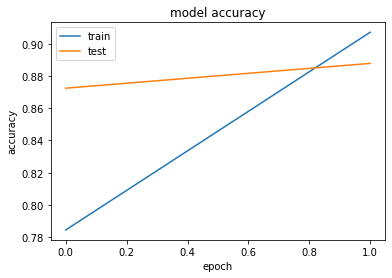

In [41]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

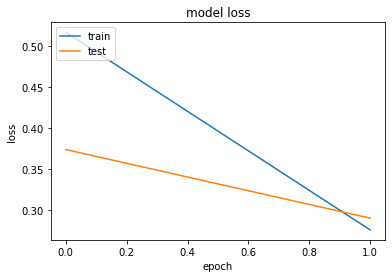

In [42]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()